In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import matplotlib.image as mpimg

In [5]:
from keras.models import Model, Sequential
from keras.layers import Input, Embedding, Dense, Conv2D, Activation, Dot, Reshape,MaxPooling2D, Flatten

Using TensorFlow backend.


In [6]:
    
def process_image(path):
    img = image.load_img(path, target_size=(224, 224, 3))
    img_array = image.img_to_array(img)
    
    return img_array

In [7]:
train = pd.read_csv('data/pracdat.csv')

In [8]:
def extract_data(df):
    
    
    data1, data2, labels = [], [], []

    for _,row in df.iterrows():
        img_one = process_image('data/'+ row['HeroID'])
        img_two = process_image('data/'+ row['StylingID'])
        label = row['Match']
        labels.append(label)
        
#         combined_image = np.concatenate((img_one, img_two), axis =1)
        data1.append(img_one)
        data2.append(img_two)

        
    labels = np.array(labels)
    data1 = np.array(data1)/255.0
    data2 = np.array(data2)/255.0
    
#     print(len(data))
#     print(len(labels))
    return data1, data2, labels

In [9]:
from keras.preprocessing import image

In [10]:
traindata1, traindata2, trainlabel = extract_data(train)


In [11]:
vision_model = Sequential()
vision_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
vision_model.add(Conv2D(64, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(128, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Flatten())

In [12]:
outfit1 = Input(name = 'outfit1', shape = (224, 224, 3))
outfit1Model = vision_model(outfit1)

outfit2 = Input(name = 'outfit2', shape = (224, 224, 3))
outfit2Model = vision_model(outfit2)

In [13]:
merged = Dot(name = 'dot_product', normalize = True, axes = 1)([outfit1Model, outfit2Model])
merged = Reshape(target_shape = [1])(merged)

In [14]:
out = Dense(1, activation = 'sigmoid')(merged)


In [15]:
model = Model(inputs =[outfit1, outfit2], outputs = out)

In [16]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
outfit1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
outfit2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 160000)       1735488     outfit1[0][0]                    
                                                                 outfit2[0][0]                    
__________________________________________________________________________________________________
dot_product (Dot)               (None, 1)            0           sequential_2[3][0]         

In [37]:
model.fit([traindata1, traindata2], trainlabel,
                    epochs=30,
                    batch_size=9
                    )


Epoch 1/30
9/9 [==============================] - 13s 1s/step - loss: 0.8081 - accuracy: 0.5556
Epoch 2/30
9/9 [==============================] - 10s 1s/step - loss: 0.8076 - accuracy: 0.5556
Epoch 3/30
9/9 [==============================] - 13s 1s/step - loss: 0.7858 - accuracy: 0.5556
Epoch 4/30
9/9 [==============================] - 11s 1s/step - loss: 0.7323 - accuracy: 0.5556
Epoch 5/30
9/9 [==============================] - 11s 1s/step - loss: 0.7001 - accuracy: 0.5556
Epoch 6/30
9/9 [==============================] - 10s 1s/step - loss: 0.8210 - accuracy: 0.5556
Epoch 7/30
9/9 [==============================] - 11s 1s/step - loss: 0.8105 - accuracy: 0.5556
Epoch 8/30
9/9 [==============================] - 10s 1s/step - loss: 0.7882 - accuracy: 0.5556
Epoch 9/30
9/9 [==============================] - 10s 1s/step - loss: 0.7597 - accuracy: 0.5556
Epoch 10/30
9/9 [==============================] - 10s 1s/step - loss: 0.7208 - accuracy: 0.5556
Epoch 11/30
9/9 [======================

In [39]:
model.save('first_attempt_class.h5')

In [55]:
predict_df = pd.read_csv('data/pracdatatest.csv')

In [56]:
testdata1, testdata2, testlabel = extract_data(predict_df)

In [57]:
features = model.predict([testdata1, testdata2])

In [69]:
print(features)

[[0.7273589 ]
 [0.75668967]
 [0.74726164]
 [0.640111  ]]


In [71]:
from sklearn.manifold import TSNE

[t-SNE] Computing 3 nearest neighbors...
[t-SNE] Indexed 4 samples in 0.000s...
[t-SNE] Computed neighbors for 4 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 4 / 4
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 36.584835
[t-SNE] KL divergence after 1000 iterations: 0.048696


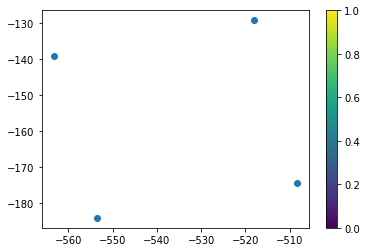

In [73]:
tsne_results = TSNE(n_components=2,verbose=1,metric='cosine').fit_transform(features)

# Plot a scatter plot from the generated t-SNE results
colormap = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1],cmap=colormap)
plt.colorbar(scatter_plot)
plt.show()

In [1]:
features[0].shape

NameError: name 'features' is not defined